This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59
- Part 2: Mon 20.2 at 23:59
- Part 3: Mon 6.3 at 23:59

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [124]:
# import uuid
# # Run this cell only once and save the code. Use the same id code for each Part.
# # Printing random id using uuid1()
# print ("The id code is: ",end="")
# print (uuid.uuid1())

The id code is: bc75471a-a096-11ed-8824-3dc691ec23e7

# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction (1 p)

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell 
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder 
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total) 
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV) 
- plot one example image of each rice species, including the contour 

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel 
    - Variance for each RGB color channel 
    - Skewness for each RGB color channel 
    - Kurtosis for each RGB color channel 
    - Entropy for each RGB color channel 
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV) 
- Plot one example image of each rice species including the fitted ellipse 
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse 
    - the minor axis length of the ellipse 
    - area inside the contour (you can use e.g. *contourArea* from OpenCV) 
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV) 
    - roundness 
    - aspect ratio 
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns.  <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder. 

# Part # 1

In [125]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mimg
import os, os.path as path

import cv2
import math


In [126]:
data_path = "../data"
training_data_path = "../training_data/"
imgs = "../imgs/"

In [127]:
def random_data(data_path):
    data = []
    for folder in os.listdir(data_path):
        data.extend([{"path": path.join(data_path, folder, file), "label": folder}
                    for file in np.random.choice(os.listdir(f'{data_path}/{folder}'), 100, replace=False)])
    df = pd.DataFrame(data)
    return df


In [128]:
rice_df = random_data(data_path)

In [129]:
rice_df.sample(10)

,path,label
242,../data/Arborio/Arborio (9307).jpg,Arborio
220,../data/Arborio/Arborio (11724).jpg,Arborio
198,../data/Jasmine/Jasmine (8566).jpg,Jasmine
215,../data/Arborio/Arborio (12923).jpg,Arborio
273,../data/Arborio/Arborio (6977).jpg,Arborio
145,../data/Jasmine/Jasmine (9320).jpg,Jasmine
245,../data/Arborio/Arborio (8436).jpg,Arborio
235,../data/Arborio/Arborio (11866).jpg,Arborio
92,../data/Basmati/basmati (1971).jpg,Basmati
167,../data/Jasmine/Jasmine (1997).jpg,Jasmine


In [130]:
def find_major_minor_axis(ellipse, img):
    (xc, yc), (d1, d2), angle = ellipse

    major = max(d1, d2)/2

    if angle > 90:
        angle = angle - 90
    else:
        angle = angle + 90
    xtop = xc + math.cos(math.radians(angle))*major
    ytop = yc + math.sin(math.radians(angle))*major
    xbot = xc + math.cos(math.radians(angle+180))*major
    ybot = yc + math.sin(math.radians(angle+180))*major

    cv2.line(img, (int(xtop), int(ytop)),
             (int(xbot), int(ybot)), (0, 0, 255), 3)

    minor = min(d1, d2)/2

    xtop = xc + math.cos(math.radians(angle))*minor
    ytop = yc + math.sin(math.radians(angle))*minor
    xbot = xc + math.cos(math.radians(angle+180))*minor
    ybot = yc + math.sin(math.radians(angle+180))*minor

    cv2.line(img, (int(xtop), int(ytop)),
             (int(xbot), int(ybot)), (0, 0, 255), 3)

    return img


In [131]:
for index, row in rice_df.iterrows():
    img_path = row["path"]
    
    img = cv2.imread(img_path)
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.drawContours(img, contours, -1, (0,255,0), 3)

    ellipse = cv2.fitEllipse(contours[0])

    cv2.ellipse(img,ellipse, (0,0,255), 3)
    
    img = find_major_minor_axis(ellipse, img)

    moments = cv2.moments(contours[0])

    cx = moments['m10']/moments['m00']
    cy = moments['m01']/moments['m00']

    area = cv2.contourArea(contours[0])
    
    perimeter = cv2.arcLength(contours[0], True)

    img_path =  os.path.join(imgs,*(img_path.split(os.path.sep)[3:]))
    cv2.imwrite(img_path, img)
    
    rice_df.at[index,'contours'] = img_path

In [132]:
rice_df.sample(10)

,path,label,contours
154,../data/Jasmine/Jasmine (12595).jpg,Jasmine,../imgs/Jasmine (12595).jpg
41,../data/Basmati/basmati (11048).jpg,Basmati,../imgs/basmati (11048).jpg
68,../data/Basmati/basmati (14158).jpg,Basmati,../imgs/basmati (14158).jpg
92,../data/Basmati/basmati (1971).jpg,Basmati,../imgs/basmati (1971).jpg
293,../data/Arborio/Arborio (5117).jpg,Arborio,../imgs/Arborio (5117).jpg
141,../data/Jasmine/Jasmine (901).jpg,Jasmine,../imgs/Jasmine (901).jpg
189,../data/Jasmine/Jasmine (9357).jpg,Jasmine,../imgs/Jasmine (9357).jpg
27,../data/Basmati/basmati (2007).jpg,Basmati,../imgs/basmati (2007).jpg
232,../data/Arborio/Arborio (6346).jpg,Arborio,../imgs/Arborio (6346).jpg
237,../data/Arborio/Arborio (1377).jpg,Arborio,../imgs/Arborio (1377).jpg


In [133]:
samples = rice_df.groupby('label').sample(1).reset_index()

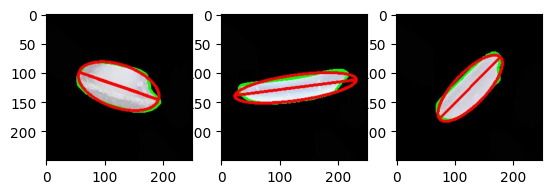

In [134]:
f, ax = plt.subplots(1,3)
for i, sample in samples.iterrows():
    img = mimg.imread(sample["contours"])
    ax[i].imshow(img)
